# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from numpy.random import RandomState
from sklearn.model_selection import cross_val_score

## Подготовка данных

In [2]:
train = pd.read_csv('/datasets/gold_industry_train.csv')
test = pd.read_csv('/datasets/gold_industry_test.csv')
data = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [6]:
test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [7]:
train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [8]:
data.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


Проверим расчет эффективности обогащения.

In [9]:
enrichment_efficiency = ((train['rougher.output.concentrate_au'] * \
                         (train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) / \
                         (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - \
                                                            train['rougher.output.tail_au'])))*100
enrichment_efficiency.mean()

82.52119968211336

In [10]:
train['rougher.output.recovery'].mean()

82.52119968211336

Эффективность рассчитана правильно.

Найдем среднюю абсолютную ошибку между значениями признака и нашими расчетами

In [11]:
mean_absolute_error(enrichment_efficiency, train['rougher.output.recovery'])

9.83758577644259e-15

Значение абсолютной ошибки очень мало, а так же средние значения нашего рассчета и rougher.output.recovery равны, что говорит нам о том, что эффективность обогащения рассчитана верно.

Проверим отличающиеся столбцы в test и train.

In [12]:
set(train.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Видим, что признаки отсутствующие в тестовой выборке это в выходные результаты, поэтому имеет смысл удалить их из тренировочной выборки, так как они могут быть утечкой целевого признака.

Проведем предобработку данных. Удалим из обучающей выборки столбцы, которых нет в тестовой

In [13]:
train_new = train[test.columns]
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14579 non-null  object 
 1   rougher.input.feed_au                       14579 non-null  float64
 2   rougher.input.feed_ag                       14579 non-null  float64
 3   rougher.input.feed_pb                       14507 non-null  float64
 4   rougher.input.feed_sol                      14502 non-null  float64
 5   rougher.input.feed_rate                     14572 non-null  float64
 6   rougher.input.feed_size                     14478 non-null  float64
 7   rougher.input.floatbank10_sulfate           14548 non-null  float64
 8   rougher.input.floatbank10_xanthate          14572 non-null  float64
 9   rougher.state.floatbank10_a_air             14579 non-null  float64
 10  rougher.st

In [14]:
train_new.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          72
rougher.input.feed_sol                         77
rougher.input.feed_rate                         7
rougher.input.feed_size                       101
rougher.input.floatbank10_sulfate              31
rougher.input.floatbank10_xanthate              7
rougher.state.floatbank10_a_air                 0
rougher.state.floatbank10_a_level               0
rougher.state.floatbank10_b_air                 0
rougher.state.floatbank10_b_level               0
rougher.state.floatbank10_c_air                 0
rougher.state.floatbank10_c_level               0
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air               429
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [15]:
test.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [16]:
data.isna().sum()

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

Заполним пропущенные значения предыдущими, так как значения у нас распределенны по времени.

In [17]:
train_new.fillna(method='ffill', inplace=True)
train_new.isna().sum()

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

In [18]:
test.fillna(method='ffill', inplace=True)
test.isna().sum()

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

In [19]:
data.fillna(method='ffill', inplace=True)
data.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

На этапе предобработки мы избавились от ненужных столбцов в обучающей выборки и заполнили пропущенные значения.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Отфильтруем нужные нам данные для металлов.

In [20]:
data_au = data[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]
data_ag = data[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']]
data_pb = data[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]

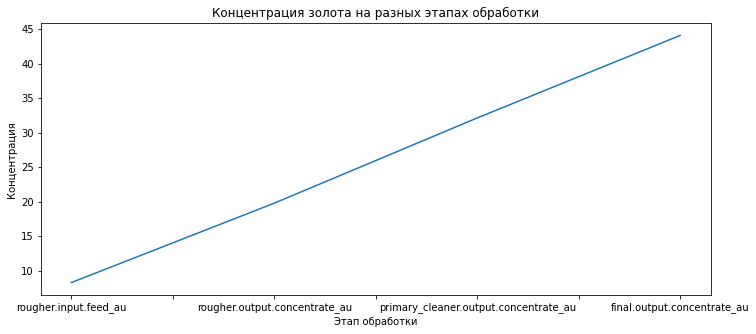

In [21]:
data_au.mean().plot(figsize=(12,5))
plt.title('Концентрация золота на разных этапах обработки')
plt.ylabel('Концентрация')
plt.xlabel('Этап обработки');

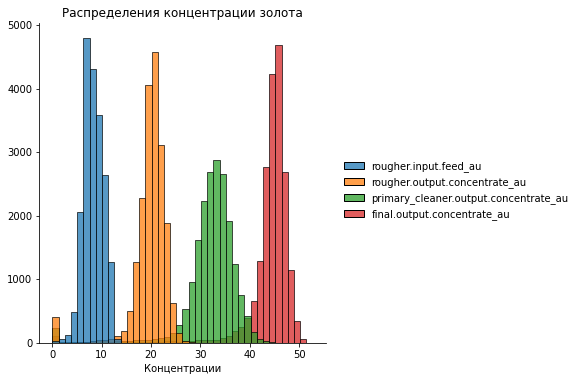

In [22]:
sns.displot(data_au);
plt.title('Распределения концентрации золота')
plt.ylabel('')
plt.xlabel('Концентрации');

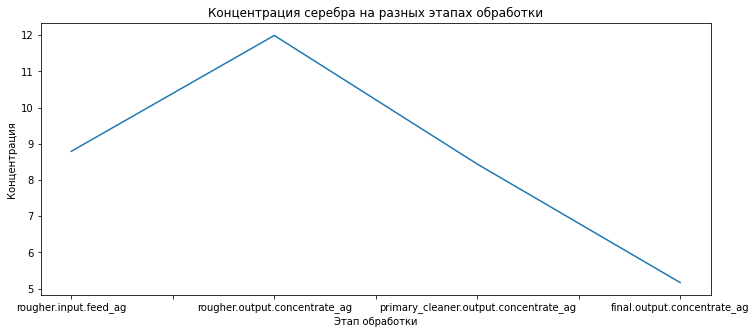

In [23]:
data_ag.mean().plot(figsize=(12,5))
plt.title('Концентрация серебра на разных этапах обработки')
plt.ylabel('Концентрация')
plt.xlabel('Этап обработки');

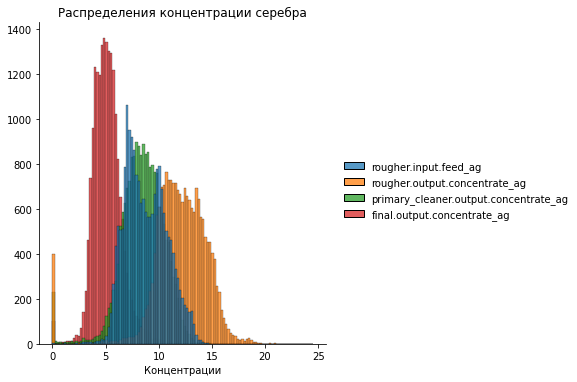

In [24]:
sns.displot(data_ag);
plt.title('Распределения концентрации серебра')
plt.ylabel('')
plt.xlabel('Концентрации');

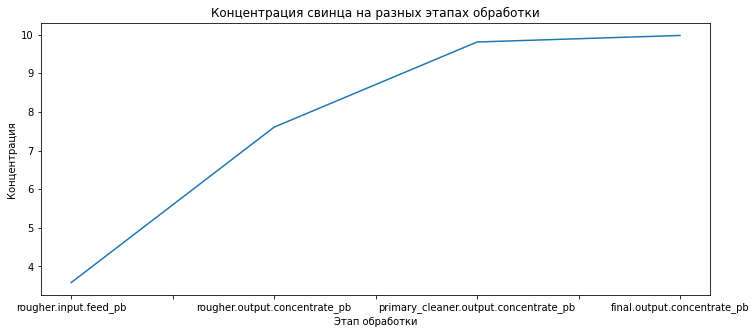

In [25]:
data_pb.mean().plot(figsize=(12,5))
plt.title('Концентрация свинца на разных этапах обработки')
plt.ylabel('Концентрация')
plt.xlabel('Этап обработки');

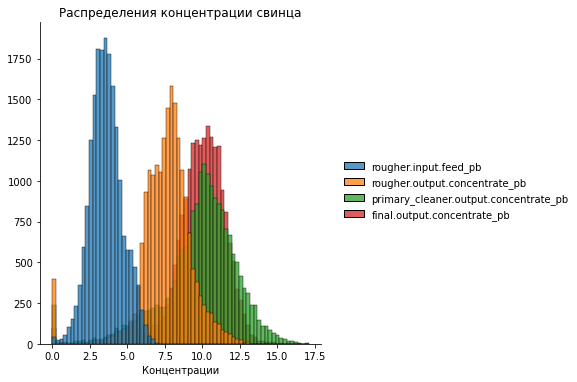

In [26]:
sns.displot(data_pb);
plt.title('Распределения концентрации свинца')
plt.ylabel('')
plt.xlabel('Концентрации');

Концентрация золота равномерно растет в процессе очистки. Концентрация серебра растет при переходи от сырья к черновому концентрату и падает в следующих этапах. Концентрация свинца растет при переходе от первой стадии ко второй и чуть медленнее растет при переходе к другим этапам. 

Так же можем заметить большое количество выбросов в 0 значении. Избавимся от них.

In [27]:
data_new = data.replace(0, np.nan)
data_new = data_new.dropna(how='all', axis=0)

Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

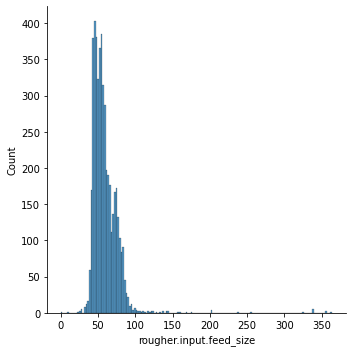

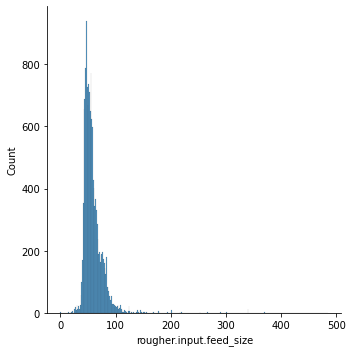

In [28]:
sns.displot(test['rougher.input.feed_size'])
sns.displot(train_new['rougher.input.feed_size']);

In [29]:
test['rougher.input.feed_size'].describe()

count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

In [30]:
train_new['rougher.input.feed_size'].describe()

count    14579.000000
mean        59.070865
std         22.903811
min          0.049194
25%         47.322462
50%         54.464259
75%         64.469177
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Как мы видим из графиков и из describe средние и медианные значения выборок, а так же первый квантиль и третий,  практически одинаковые для них обеих, что говорит нам о том, что распределения практически равны

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

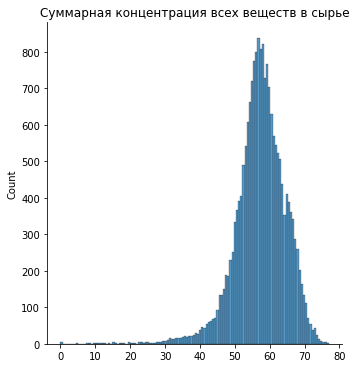

In [31]:
sns.displot(data['rougher.input.feed_au'] + \
            data['rougher.input.feed_ag'] + \
            data['rougher.input.feed_pb'] + \
            data['rougher.input.feed_sol'])
plt.title('Суммарная концентрация всех веществ в сырье');

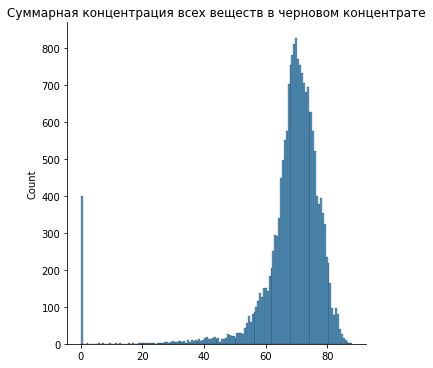

In [32]:
sns.displot(data['rougher.output.concentrate_au'] + \
            data['rougher.output.concentrate_ag'] + \
            data['rougher.output.concentrate_pb'] + \
            data['rougher.output.concentrate_sol'])
plt.title('Суммарная концентрация всех веществ в черновом концентрате');

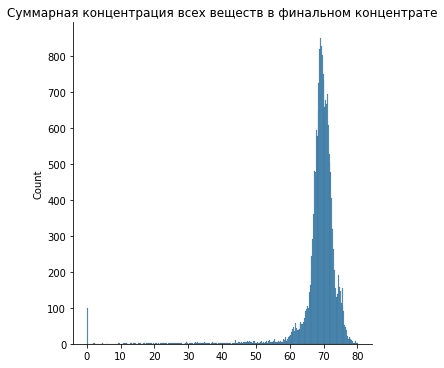

In [33]:
sns.displot(data['final.output.concentrate_au'] + \
            data['final.output.concentrate_ag'] + \
            data['final.output.concentrate_pb'] + \
            data['final.output.concentrate_sol'])
plt.title('Суммарная концентрация всех веществ в финальном концентрате');

По данным графиками мы можем увидеть аномалии во второй и третьей стадии в 0. Избавимся от них.

In [34]:
data_new = data.replace(0, np.nan)
data_new = data_new.dropna(how='all', axis=0)

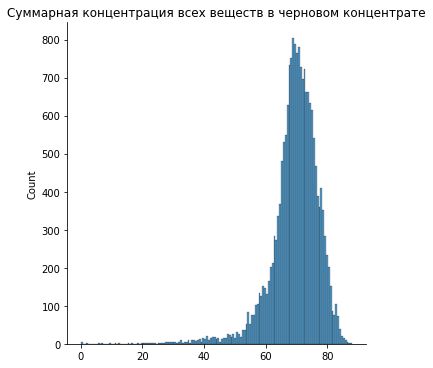

In [35]:
sns.displot(data_new['rougher.output.concentrate_au'] + \
            data_new['rougher.output.concentrate_ag'] + \
            data_new['rougher.output.concentrate_pb'] + \
            data_new['rougher.output.concentrate_sol'])
plt.title('Суммарная концентрация всех веществ в черновом концентрате');

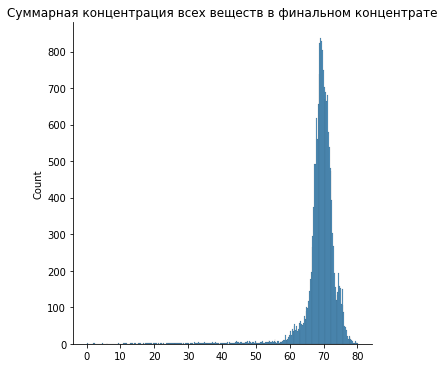

In [36]:
sns.displot(data_new['final.output.concentrate_au'] + \
            data_new['final.output.concentrate_ag'] + \
            data_new['final.output.concentrate_pb'] + \
            data_new['final.output.concentrate_sol'])
plt.title('Суммарная концентрация всех веществ в финальном концентрате');

Проведя анализ данных мы получили, что:  
1. Концентрация золота равномерно растет в процессе очистки. Концентрация серебра растет при переходи от сырья к черновому концентрату и падает в следующих этапах. Концентрация свинца растет при переходе от первой стадии ко второй и чуть медленнее растет при переходе к другим этапам.
2. Исходя из графиков и из describe средние и медианные значения выборок, а так же первый квантиль и третий, практически одинаковые для них обеих, что говорит нам о том, что распределения практически равны
3. На последней стадии суммарная концентрация металлов уменьшается.

## Модель

Так как в нашей тестовой и обучающей выборках нет целевых признаков - добавим их из полного датасета по дате.

In [37]:
target_data = data[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [38]:
train_new = train_new.merge(target_data, how='left', on='date')
test = test.merge(target_data, how='left', on='date')

Теперь удалим столбцы с датой, потому что они не нужны нам для построения моделей.

In [39]:
test.drop(['date'], axis=1, inplace=True)
train_new.drop(['date'], axis=1, inplace=True)

Напишем функцию для подсчета sMAPE.

In [40]:
def smape(target, predicted):
    return ((1/len(target)) * np.sum(2 * np.abs(target - predicted) / (np.abs(target) + np.abs(predicted)))) * 100

Разделим выборки на target и features.

In [41]:
train_target_rougher = train_new['rougher.output.recovery']
train_target_final = train_new['final.output.recovery']
train_features = train_new.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [42]:
test_target_rougher = test['rougher.output.recovery']
test_target_final = test['final.output.recovery']
test_features = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

Маштабируем признаки.

In [43]:
scaler = StandardScaler()
scaler.fit(train_features)

train_features = pd.DataFrame(scaler.transform(train_features))
test_features = pd.DataFrame(scaler.transform(test_features))

Обучим модели.

Начнем с линейной регрессии.

In [44]:
model_linear = LinearRegression()
smape_score = make_scorer(smape, greater_is_better=False)
rougher = cross_val_score(model_linear, train_features, train_target_rougher, scoring=smape_score, cv=5)
final = cross_val_score(model_linear, train_features, train_target_final, scoring=smape_score, cv=5)
print('Финальный sMAPE равен:', -(0.25 * rougher.mean() + 0.75 * final.mean()))

Финальный sMAPE равен: 11.822250505945679


Теперь обучим решающее дерево.

In [45]:
best_model_tree = None
best_smape = -11.822250505945679
best_depth = 0
for depth in range(1,10):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    rougher = cross_val_score(model, train_features, train_target_rougher, scoring=smape_score, cv=5)
    final = cross_val_score(model, train_features, train_target_final, scoring=smape_score, cv=5)
    smape_final = 0.25 * rougher.mean() + 0.75 * final.mean()
    if smape_final > best_smape:
        best_model_tree = model
        best_smape = smape_final
        best_depth = depth
print("sMAPE лучшей модели:", -best_smape, "Максимальная глубина:", best_depth)  

sMAPE лучшей модели: 11.592122036148218 Максимальная глубина: 2


Обучим случайный лес.

In [46]:
best_model = None
best_smape = -11.822250505945679
best_est = 0
best_depth = 0
for est in range(10, 31, 10):
    for depth in range(1, 5):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        rougher = cross_val_score(model, train_features, train_target_rougher, scoring=smape_score, cv=5)
        final = cross_val_score(model, train_features, train_target_final, scoring=smape_score, cv=5)
        smape_final = 0.25 * rougher.mean() + 0.75 * final.mean()
        print("sMAPE", -smape_final, "Количество деревьев:",
              est, "Глубина:", depth)    
        if smape_final > best_smape:
            best_model = model
            best_smape = smape_final
            best_est = est
            best_depth = depth
print("sMAPE лучшей модели", -best_smape, "Количество деревьев:",
      best_est, "Максимальная глубина:", best_depth)    

sMAPE 11.831519419202987 Количество деревьев: 10 Глубина: 1
sMAPE 11.586456042826253 Количество деревьев: 10 Глубина: 2
sMAPE 11.579109143961515 Количество деревьев: 10 Глубина: 3
sMAPE 11.583609097639284 Количество деревьев: 10 Глубина: 4
sMAPE 11.713684309577863 Количество деревьев: 20 Глубина: 1
sMAPE 11.502722671732093 Количество деревьев: 20 Глубина: 2
sMAPE 11.536162200880753 Количество деревьев: 20 Глубина: 3
sMAPE 11.441368955785956 Количество деревьев: 20 Глубина: 4
sMAPE 11.71369294005113 Количество деревьев: 30 Глубина: 1
sMAPE 11.468078139775791 Количество деревьев: 30 Глубина: 2
sMAPE 11.52159258464031 Количество деревьев: 30 Глубина: 3
sMAPE 11.400852396354358 Количество деревьев: 30 Глубина: 4
sMAPE лучшей модели 11.400852396354358 Количество деревьев: 30 Максимальная глубина: 4


Получили лучшую модель. Это случайный лес с количеством деревьев 30 и максимальной глубиной 4.

In [47]:
best_model

RandomForestRegressor(max_depth=4, n_estimators=30, random_state=12345)

Проверим нашу получившуюся модель на тестовой выборке.

In [48]:
best_model_rougher = RandomForestRegressor(max_depth=4, n_estimators=30, random_state=12345)
best_model_final = RandomForestRegressor(max_depth=4, n_estimators=30, random_state=12345)
best_model_rougher.fit(train_features, train_target_rougher)
best_model_final.fit(train_features, train_target_final)
predictions_rougher = best_model_rougher.predict(test_features)
predictions_final = best_model_final.predict(test_features)
print('Финальный sMAPE на тестовой выборке равен', 0.25 * smape(test_target_rougher, predictions_rougher) \
      + 0.75 * smape(test_target_final, predictions_final))

Финальный sMAPE на тестовой выборке равен 7.365071187701435


Проверим нашу модель на адекватность с помощью DummyRegressor.

In [49]:
model_dummy_rougher = DummyRegressor()
model_dummy_final = DummyRegressor()
model_dummy_rougher.fit(train_features, train_target_rougher)
model_dummy_final.fit(train_features, train_target_final)
predictions_rougher_dummy = model_dummy_rougher.predict(test_features)
predictions_final_dummy = model_dummy_final.predict(test_features)
print('Финальный sMAPE DummyRegressor на тестовой выборке равен', \
      0.25 * smape(test_target_rougher, predictions_rougher_dummy) \
      + 0.75 * smape(test_target_final, predictions_final_dummy))

Финальный sMAPE DummyRegressor на тестовой выборке равен 8.843396027364125


Наша модель прошла проверку на адекватность, так как наш получившийся sMAPE меньше, чем у DummyRegressor. 

Итого минимальное sMAPE, а именно 7.365071187701435, достигается при использовании модели случайного леса с максимальной глубиной 4 и количеством деревьев равным 30.